In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We have 8 features which could possibly be used for prediction. Usefulness wise, every feature seems like it can provide some usable insight in predicting the diabetes. But more could be found out by further analysis.

In [ ]:
# read data
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (4).csv


# Column Description

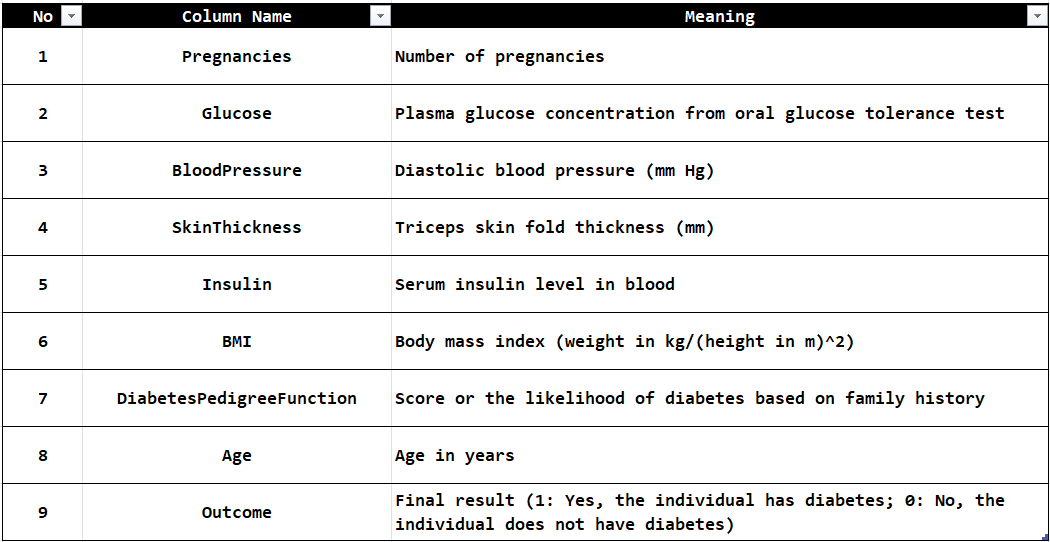

In [ ]:
# get preliminary information like sample count and quality
pima_df = pd.read_csv('diabetes.csv')
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


from matplotlib import pyplot as plt
_df_32['Pregnancies'].plot(kind='hist', bins=20, title='Pregnancies')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['Glucose'].plot(kind='hist', bins=20, title='Glucose')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35['SkinThickness'].plot(kind='hist', bins=20, title='SkinThickness')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='Pregnancies', y='Glucose', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='Glucose', y='BloodPressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='BloodPressure', y='SkinThickness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='SkinThickness', y='Insulin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Insulin']
  ys = series['Pregnancies']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('Insulin', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Insulin')
_ = plt.ylabel('Pregnancies')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Insulin']
  ys = series['Glucose']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('Insulin', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Insulin')
_ = plt.ylabel('Glucose')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Insulin']
  ys = series['BloodPressure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('Insulin', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Insulin')
_ = plt.ylabel('BloodPressure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Insulin']
  ys = series['SkinThickness']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('Insulin', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Insulin')
_ = plt.ylabel('SkinThickness')

from matplotlib import pyplot as plt
_df_44['Pregnancies'].plot(kind='line', figsize=(8, 4), title='Pregnancies')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['Glucose'].plot(kind='line', figsize=(8, 4), title='Glucose')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['BloodPressure'].plot(kind='line', figsize=(8, 4), title='BloodPressure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['SkinThickness'].plot(kind='line', figsize=(8, 4), title='SkinThickness')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
pima_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
pima_df.shape

(768, 9)

In [ ]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
print(pima_df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There seem to be no null values. But it is also observed that following columns have min value 0

1. Pregnancies

2. Glucose

3. Blood Pressure

4. SkinThickness

5. Insulin

6. BMI

Out of these only 0 number of pregnancies sound plausible. It may be the case that unknown (missing) values in other columns are simply substituted by 0. But if maximum values in certain column fall into this 'missing but substituted' category, then that feature may not provide useful insights for training.

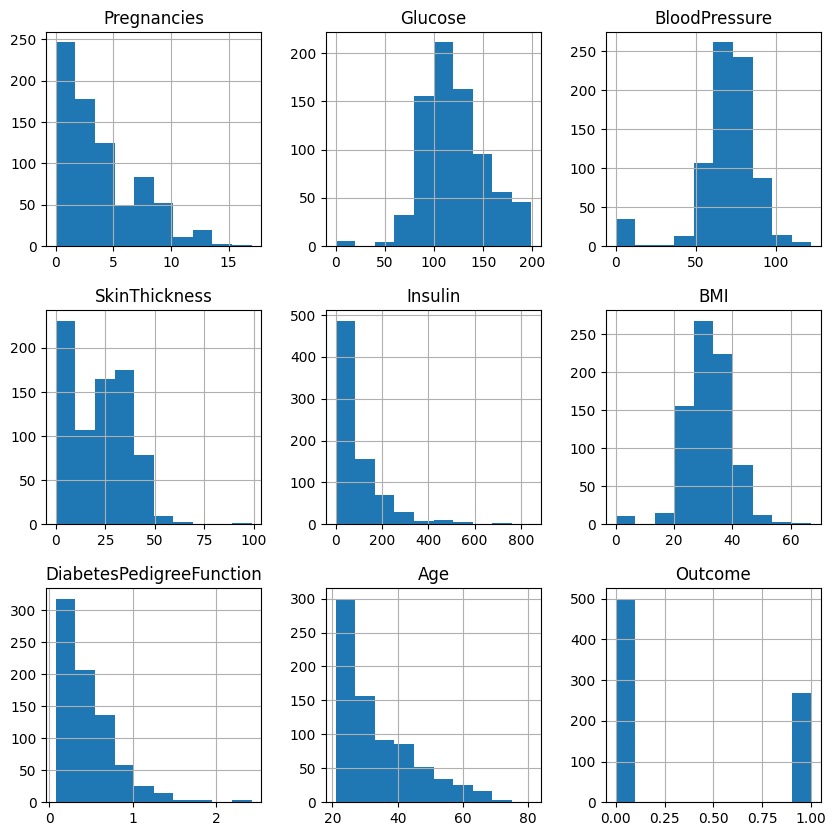

In [ ]:
# Check out value distribution of individual feature
pima_df.hist(figsize = (10,10))
plt.show()

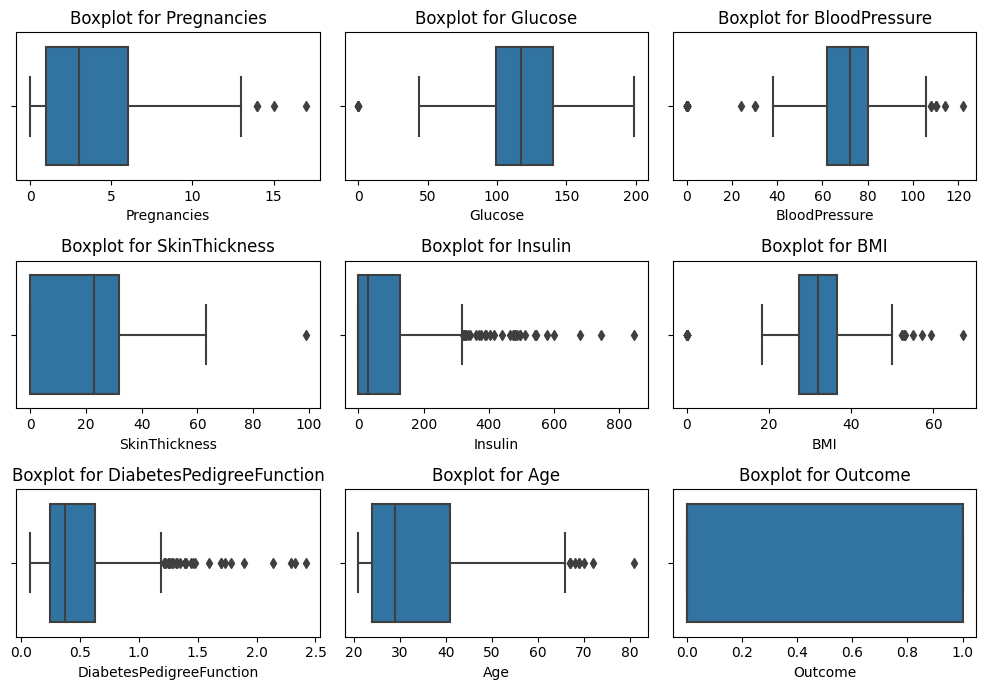

In [ ]:
# For more distribution related clarity let's study box plots
n_rows, n_columns = 3, 3

fig, axes = plt.subplots(n_rows, n_columns, figsize=(10, 7))
axes = axes.flatten()

num = 0
for i, column in enumerate(pima_df.columns):
        sns.boxplot(data = pima_df, x = column, ax = axes[num])
        axes[num].set_title(f'Boxplot for {column}')
        num += 1

# Adjust layout
plt.tight_layout()
plt.show()

The features like **Pregnancies, Glucose, BloodPressure, BMI, DiabetesPedigreeFunction and Age** show well distributed values. The range of these features seems sensible with fewer outliers.
For the features **SkinThickness and Insulin** show a bit skewed distribution, many of the values being zero. At least for SkinThickness median seems farther away from zero and the distribution looks healthy. Hence, if correlation between SkinThickness and Outcome yields good relation then, SkinThickness can still be used.

Insulin however seems like the incomplete information. So it may be good idea to drop that feature.

In [ ]:
# Check the class distribution
class_distribution = pima_df['Outcome'].value_counts()
print("\nClass Distribution:")
print(class_distribution)


Class Distribution:
0    500
1    268
Name: Outcome, dtype: int64


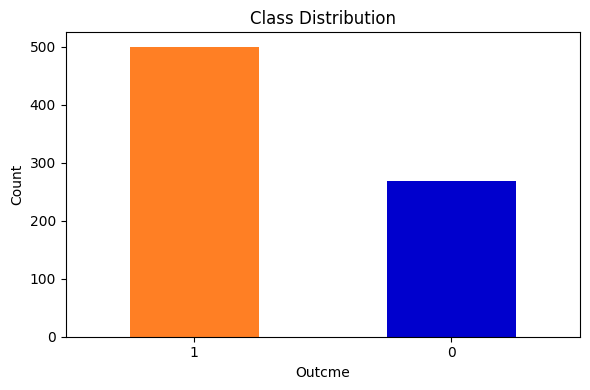

In [ ]:
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color=['#FF7F24', '#0000CD'])
plt.title("Class Distribution")
plt.xlabel("Outcme")
plt.ylabel("Count")
plt.xticks(np.arange(2), ['1', '0'], rotation=0)
plt.tight_layout()
plt.show()

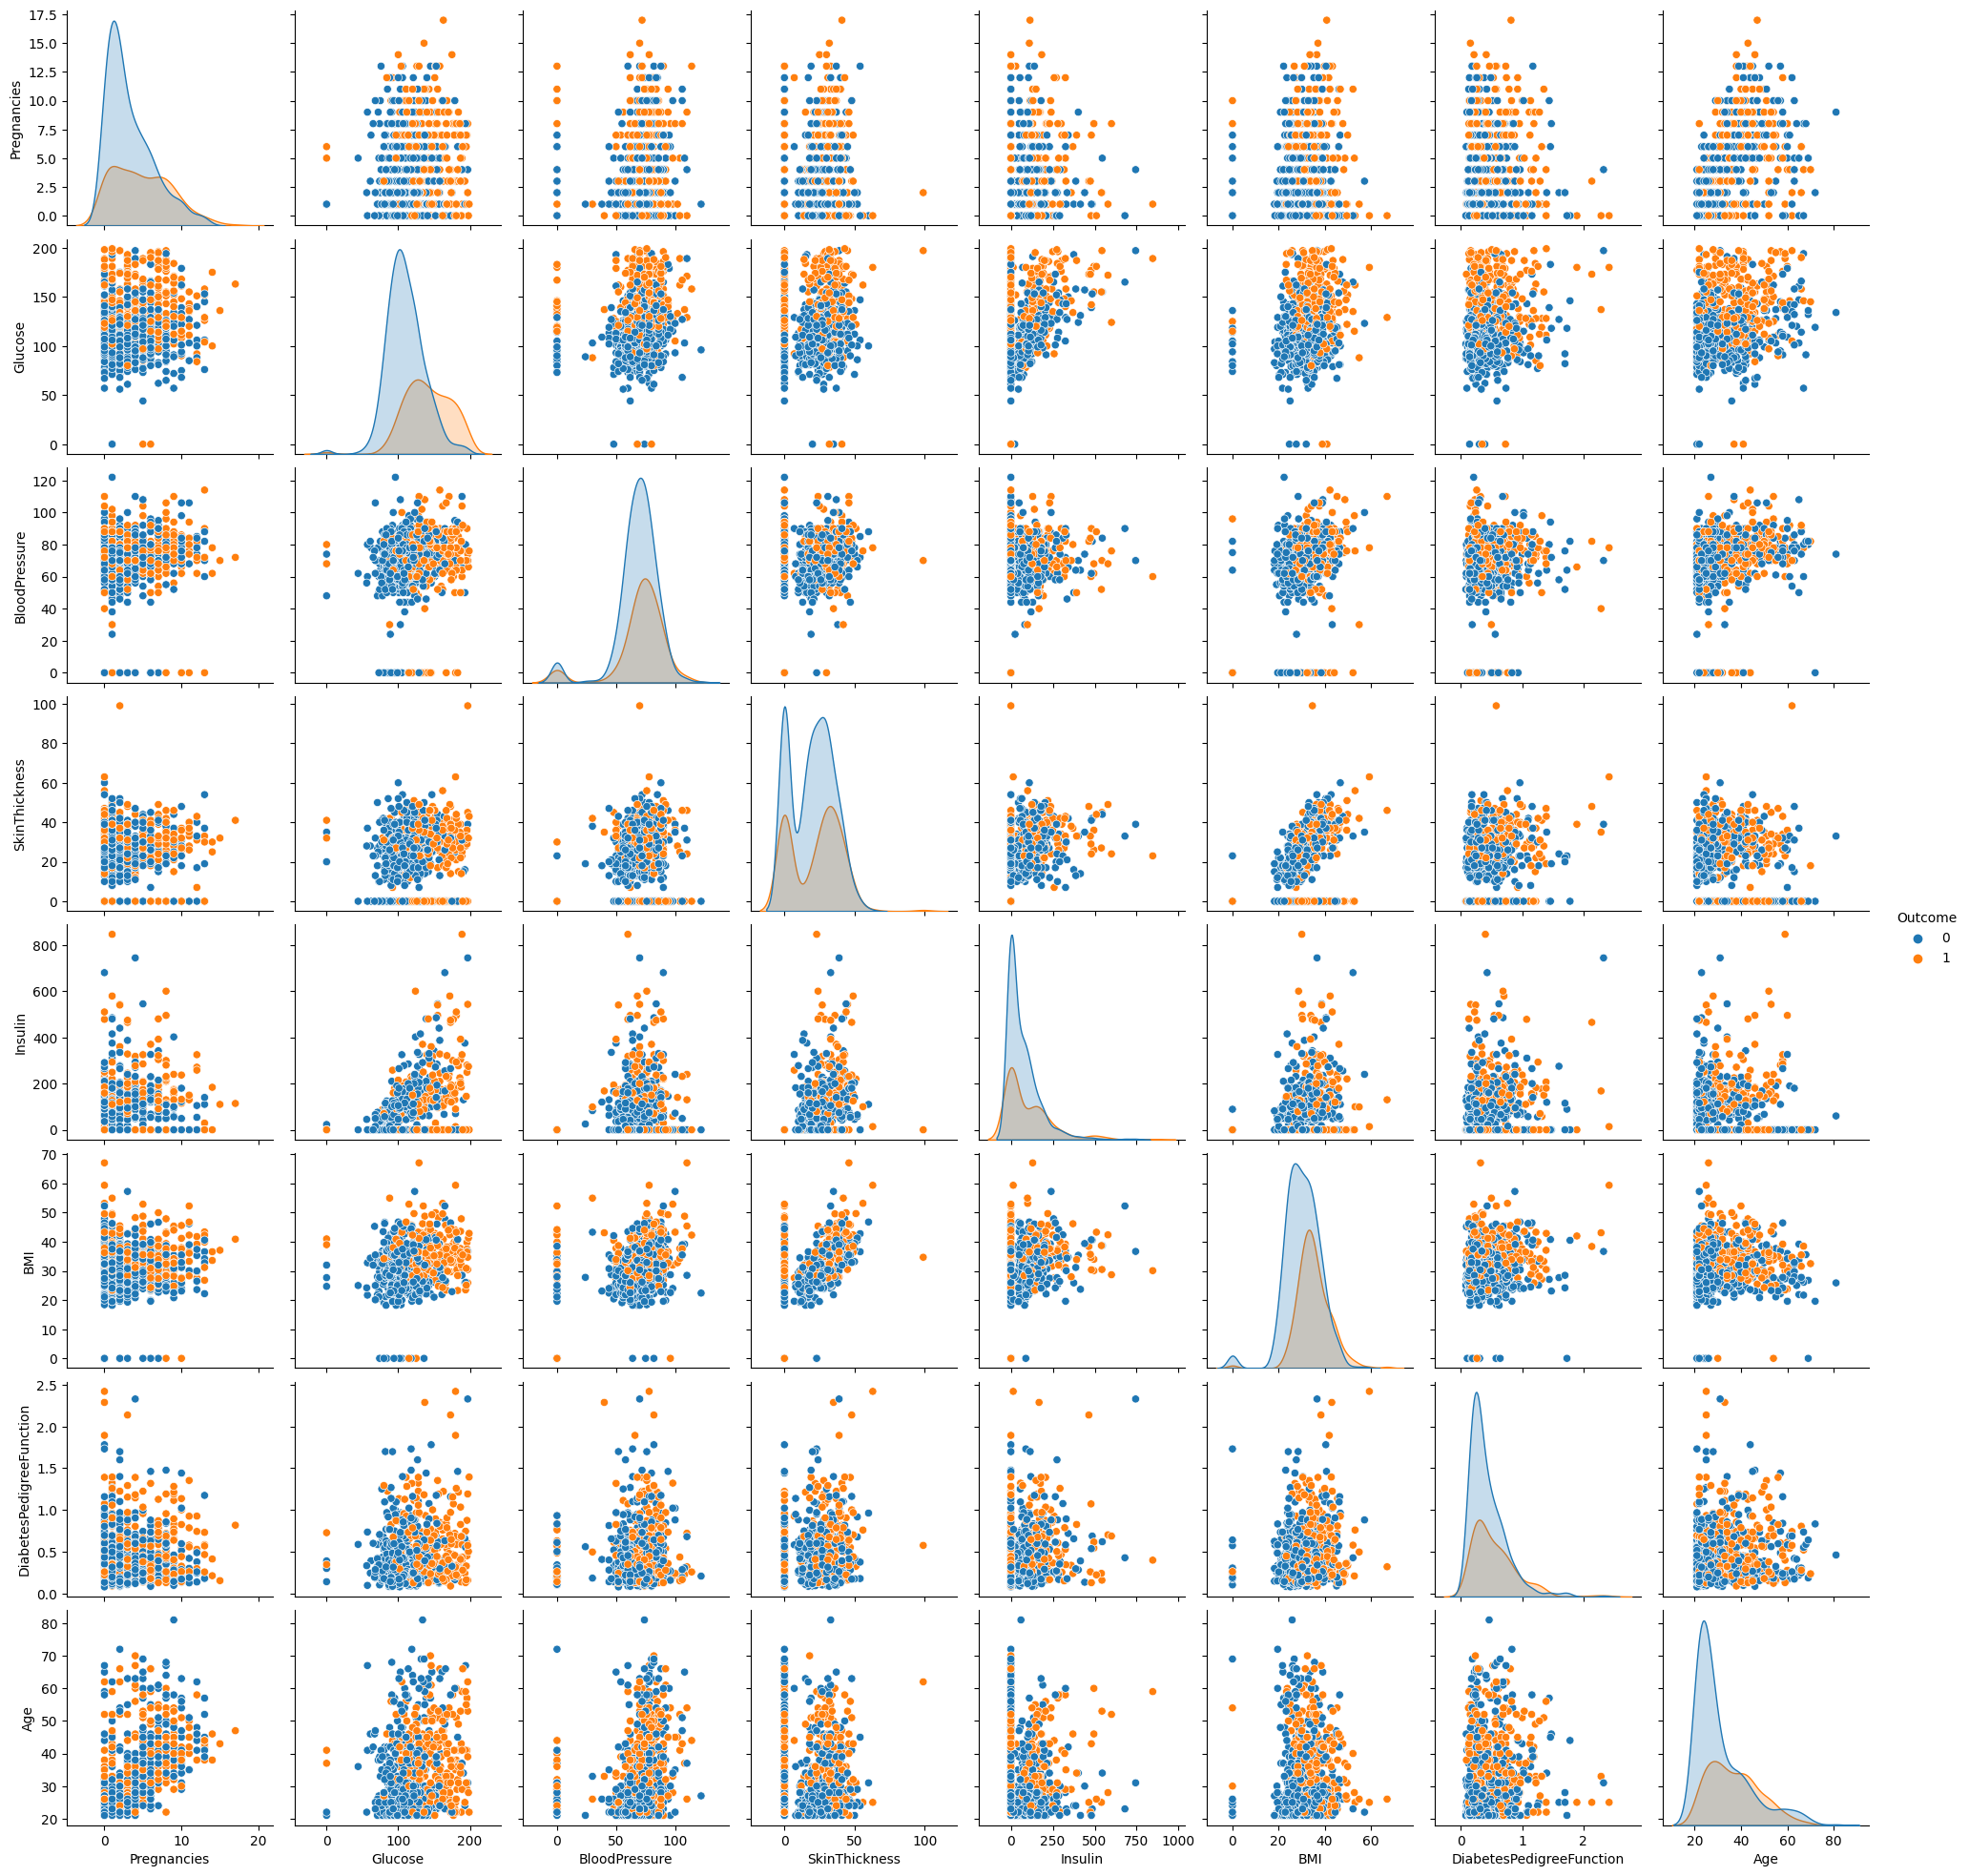

In [ ]:
# examine correlation plots
sns.pairplot(data = pima_df, hue = 'Outcome' )
plt.show()

On primary inspection there doesn't seem to be any feature that could single handedly influence the outcome. Features like Glucose, BMI and Age seem to clearly influence the outcome. But there is no single feature that could alone be conclusive in that regard.

Also, features like SkinThickness + BMI or Insulin + Glucose seem highly correlated.

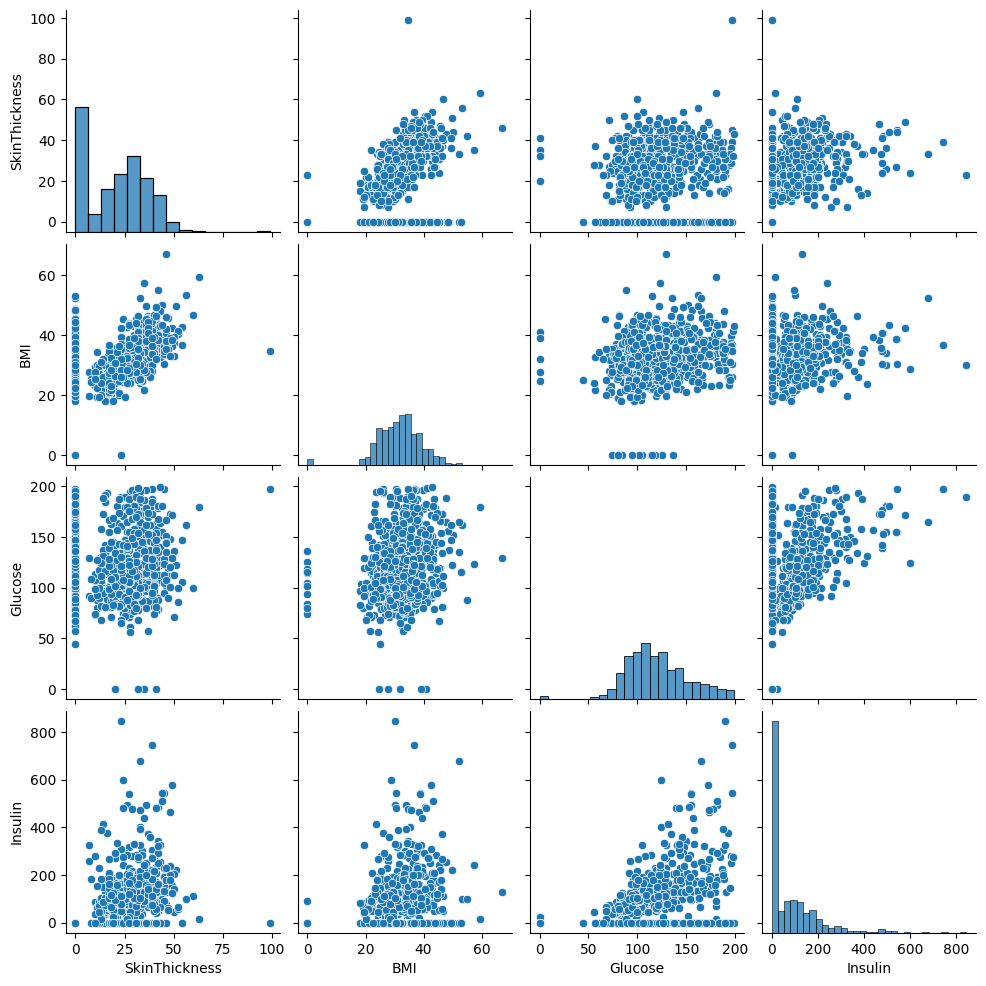

In [ ]:
# Dive deeper in feature to feature correlation
sns.pairplot(data = pima_df, vars = ['SkinThickness', 'BMI', 'Glucose', 'Insulin'])
plt.show()

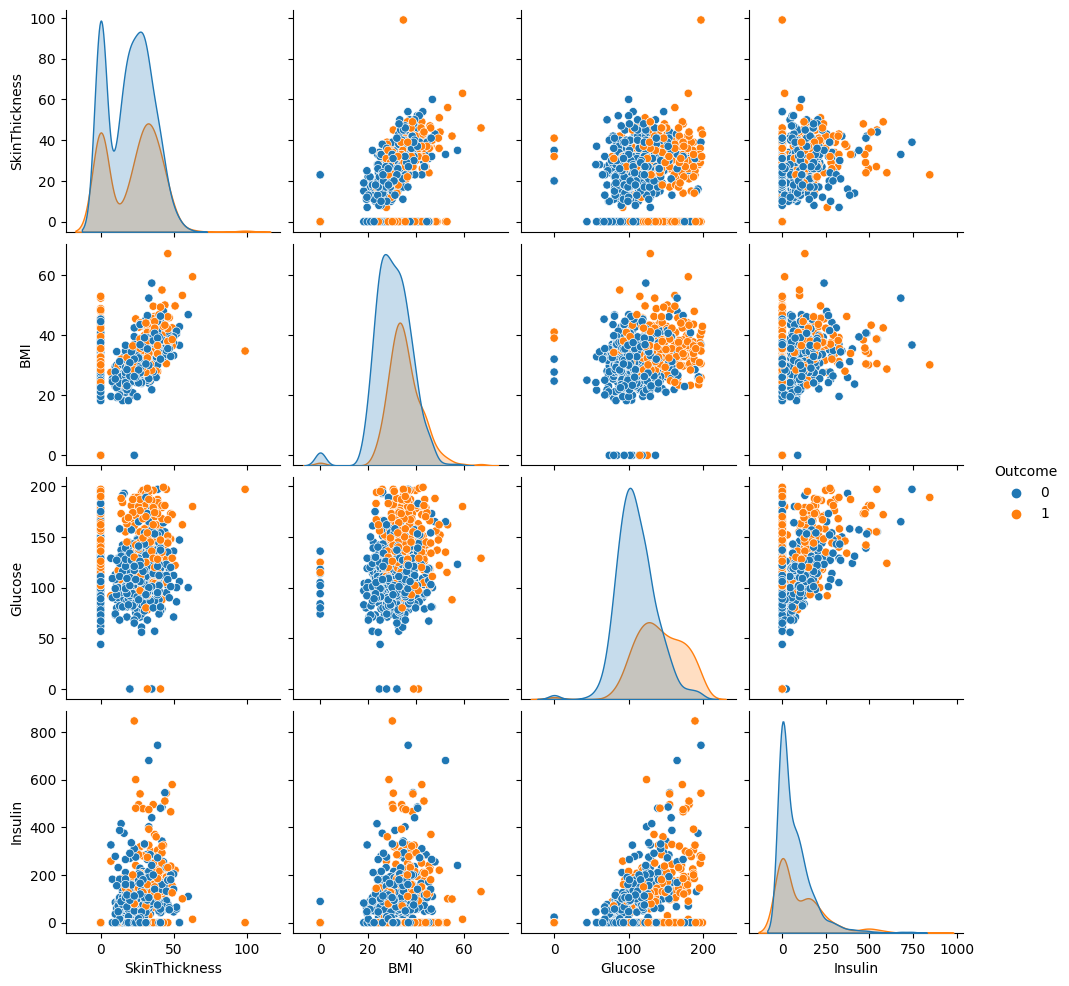

In [ ]:
sns.pairplot(data = pima_df, vars = ['SkinThickness', 'BMI', 'Glucose', 'Insulin'], hue = 'Outcome')
plt.show()

Since we could identify two such highly correlated pairs. We can safely decide which features to keep.

1. SkinThickness + BMI : We will keep BMI due to fewer missing / 0 values

2. Insulin + Glucose : We will keep Glucose again because of fewer missing / 0 values

In [66]:
# drop not needed columns
pima_df = pima_df.drop(['Insulin', 'SkinThickness'], axis = 1)

# Check for missing value

In [68]:
def missing_value(val):
    total = val.isnull().sum().sort_values(ascending = False)
    percent = (val.isnull().sum()/val.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [69]:
missing_value(pima_df)

,Total,Percent
Pregnancies,0,0.0
Glucose,0,0.0
BloodPressure,0,0.0
BMI,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0
Outcome,0,0.0


<Axes: >

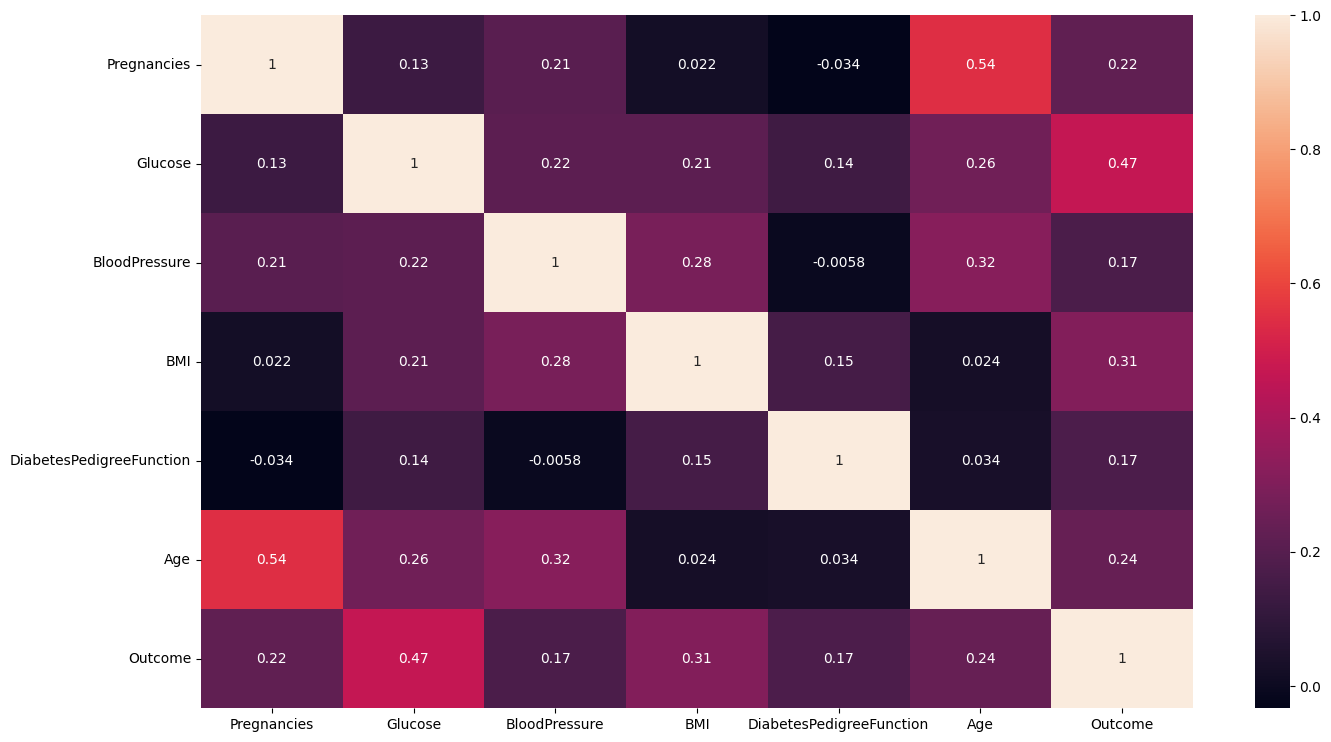

In [71]:
plt.figure(figsize=(16,9))
sns.heatmap(pima_df.corr(), annot=True)

In [73]:
hig_corr = pima_df.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Outcome"]) >= 0.2]
hig_corr_features

Index(['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome'], dtype='object')

There are no features that are 'highly' correlated with each other anymore. As far as the outcome goes, features Pregnancies, Glucose, BMI and Age seem to influence the outcome the most.